### Purpose of the Notebook

The goal of this notebook is to visually demonstrate the _modeled_ effect of recrystallization on the tungsten alloy properties.

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
from typing import List, Tuple
import sys
sys.path.append('../')
from common_util import NogamiUTSData,ProjectPaths,setup_plotting_format,setup_axis_default
import pickle

#ignore warnings and set preference for matplotlib styles
warnings.filterwarnings("ignore")
setup_plotting_format()
paths = ProjectPaths()

dbbt = {'W Plate (H)': 500.0,
        'K-W Plate (H)': 350.0,
        'K-W3%Re Plate (H)': 300.0,
        'K-W3%Re Plate (L)': 300.0}

RT = {'W Plate (H)': 1300.0,
        'K-W Plate (H)': 1300.0,
        'K-W3%Re Plate (H)': 1300.0,
        'K-W3%Re Plate (L)': 1300.0}

delta_Su = {'W Plate (H)': 271.761,
            'K-W Plate (H)': 251.897,
            'K-W3%Re Plate (H)': 293.489,
            'K-W3%Re Plate (L)': 212.309}

delta_tr = {'W Plate (H)': -36.5166,
            'K-W Plate (H)': -38.3921,
            'K-W3%Re Plate (H)': -30.2196,
            'K-W3%Re Plate (L)': -30.2196}

### Single Alloy

Plotting the modeled effect of recrystallization for a _single_ alloy. The below demonstrates the _constant_ offset for $\Delta_{rx} S_u(T)$ and the offset 

$$
\Delta_{rx} \varepsilon_{u}(T) = \frac{\varepsilon_{u,0}(T)}{\varepsilon_{tr,0}(T)} \Delta_{rx} \varepsilon_{tr}(T)
$$

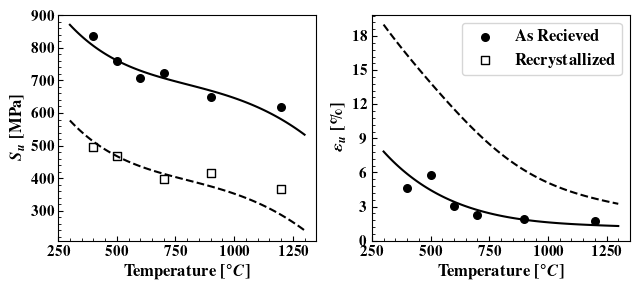

In [ ]:
fig,axes = plt.subplots(ncols = 2,figsize=(6.5,3.0))

material = 'K-W3%Re Plate (H)'
data = NogamiUTSData()

#UTS
labels = [r'\textbf{As Recieved}',r'\textbf{Recrystallized}']
for mat,symbol,fc,label in zip(['',' Rx'],['o','s'],['k','w'],labels):
    df = data.get_df(material + mat)
    df = df[df.index < RT[material]]
    df = df[df.index > dbbt[material]]
    axes[0].scatter(df.index,df.to_numpy(),s = 30,marker = symbol,edgecolor = 'k',
                  facecolor = fc,label = label)

with open(paths.MODEL.joinpath(material + '_uts.pkl'),'rb') as f:
    model = pickle.load(f)

x = np.linspace(dbbt[material],RT[material],100)
y = model.predict(x.reshape(-1,1))
axes[0].plot(x,y,'k-')
axes[0].plot(x,y- delta_Su[material],'k--')

#uniform elongation
ue = data.get_df('UE [%] ' + material)
with open(paths.MODEL.joinpath(material + '_ue.pkl'),'rb') as f:
    ue_model = pickle.load(f)

with open(paths.MODEL.joinpath(material + '_te.pkl'),'rb') as f:
    te_model = pickle.load(f)

ue_rx = ue_model.predict(x.reshape(-1,1)) - ue_model.predict(x.reshape(-1,1))/te_model.predict(x.reshape(-1,1))*delta_tr[material]

ue = ue[ue.index < RT[material]]
ue = ue[ue.index > dbbt[material]]
axes[1].scatter(ue.index,ue.to_numpy(),s = 30,marker = 'o',edgecolor = 'k',
                facecolor = 'k')

axes[1].plot(x,ue_model.predict(x.reshape(-1,1)),'k-')
axes[1].plot(x,ue_rx,'k--')

for ax in axes:
    setup_axis_default(ax)
    ax.set_xlabel(r'\textbf{Temperature [$^\circ C$]}',fontsize = 12)

axes[0].set_ylabel(r'\textbf{$S_u$ [MPa]}',fontsize = 12)
axes[1].set_ylabel(r'\textbf{$\varepsilon_{u}$ [\%]}',fontsize = 12)
axes[1].legend(handles = axes[0].get_legend_handles_labels()[0],fontsize = 12)
axes[1].set_yticks(np.arange(0,21,3))
fig.tight_layout()
fig.savefig(paths.GIT_IMAGES.joinpath('K-W3pRe_Plate_(H)_UTS_and_UE.svg'))
